In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
from scipy import sparse
import anndata
import scipy.io as sio

In [ ]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

### Chung data

In [2]:
chung = pd.read_csv('./Chung/GSE75688_GEO_processed_Breast_Cancer_raw_TPM_matrix.txt.gz', sep='\t')

In [3]:
chung.columns

Index(['gene_id', 'gene_name', 'gene_type', 'BC01_Pooled', 'BC01_Tumor',
       'BC02_Pooled', 'BC03_Pooled', 'BC03LN_Pooled', 'BC04_Pooled',
       'BC05_Pooled',
       ...
       'BC11_04', 'BC11_07', 'BC11_28', 'BC11_43', 'BC11_56', 'BC11_69',
       'BC11_70', 'BC11_78', 'BC11_81', 'BC11_88'],
      dtype='object', length=566)

In [4]:
genes = chung.iloc[:,1]

In [5]:
bars = chung.iloc[:,3:].columns

In [6]:
bars=pd.DataFrame(chung.iloc[:,3:].columns)
bars.columns = ['barcode']

In [7]:
genes = pd.DataFrame(chung.iloc[:,1])
genes.columns = ['gene']

In [8]:
chung_data = anndata.AnnData(X= chung.iloc[:,3:].to_numpy().T,
                        obs=bars,
                        var=genes)

/home/olam/miniconda3/envs/scell/lib/python3.6/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [9]:
chung_data

AnnData object with n_obs × n_vars = 563 × 57915
    obs: 'barcode'
    var: 'gene'

In [37]:
chung_data.var_names_make_unique() 

In [24]:
chung_data.var_names = chung_data.var['gene']

In [25]:
chung_data.var

,gene
gene,
TSPAN6,TSPAN6
TNMD,TNMD
DPM1,DPM1
SCYL3,SCYL3
C1orf112,C1orf112
...,...
ERCC-00170,ERCC-00170
ERCC-00171,ERCC-00171
EC2,EC2


normalizing counts per cell
    finished (0:00:00)


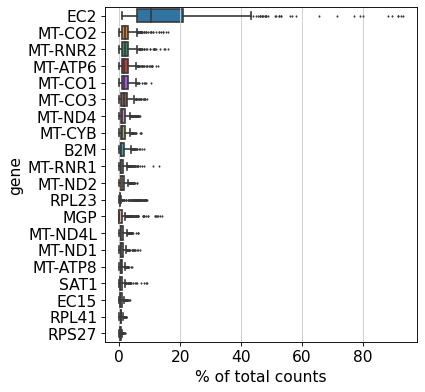

In [26]:
sc.pl.highest_expr_genes(chung_data, n_top=20)

In [33]:
chung_data.var_names.str.startswith('MT-'))

True

In [38]:
sc.pp.filter_genes(chung_data, min_cells=3)
chung_data.var['mt'] = chung_data.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(chung_data, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

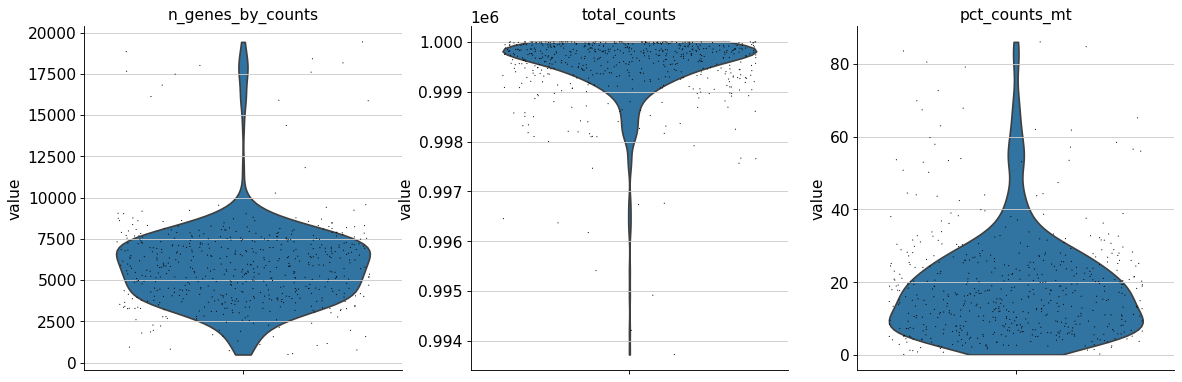

In [39]:
sc.pl.violin(chung_data, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

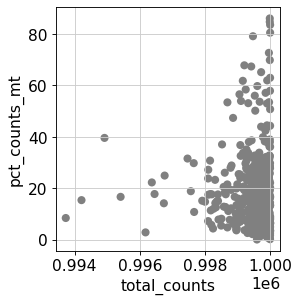

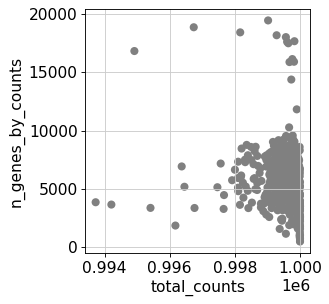

In [40]:
sc.pl.scatter(chung_data, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(chung_data, x='total_counts', y='n_genes_by_counts')

In [ ]:
chung_data = chung_data[chung_data.obs.n_genes_by_counts < 2500, :]
chung_data = chung_data[chung_data.obs.pct_counts_mt < 5, :]

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [ ]:
sc.pp.log1p(adata)

In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [47]:
meta = pd.read_csv('./Chung/GSE75688_final_sample_information.txt.gz', sep='\t')

In [48]:
meta

,sample,type,index,index2,index3
0,BC01_02,SC,Tumor,Tumor,Tumor
1,BC01_03,SC,Tumor,Tumor,Tumor
2,BC01_04,SC,Tumor,Tumor,Tumor
3,BC01_05,SC,Tumor,Tumor,Tumor
4,BC01_06,SC,Tumor,Tumor,Tumor
...,...,...,...,...,...
523,BC06_58,SC,nonTumor,Immune,Bcell
524,BC06_60,SC,Tumor,Tumor,Tumor
525,BC06_61,SC,nonTumor,Immune,Bcell
526,BC06_74,SC,Tumor,Tumor,Tumor


In [74]:
tcells = meta.loc[meta['index3'] == 'Tcell']

In [57]:
chung_data.obs_names = chung_data.obs['barcode']

In [71]:

# adata[adata.obs['time'].isin(['day 1', 'day 2'])]

chung_data[chung_data.obs['barcode'].isin(tcells['sample'])]

View of AnnData object with n_obs × n_vars = 54 × 31042
    obs: 'barcode', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [75]:
len(tcells['sample'])

54

### Wu

In [101]:
bars = pd.read_csv('./Wu/wu_barcodes.tsv.gz', header=None)
genes = pd.read_csv('./Wu/wu_features.tsv.gz', header=None, sep='\t')
m = sio.mmread('./Wu/wu_matrix.mtx.gz')

In [169]:
m = sparse.csr_matrix(m)

In [86]:
wu_data.obs

,0
0,CID3586_AAGACCTCAGCATGAG
1,CID3586_AAGGTTCGTAGTACCT
2,CID3586_ACCAGTAGTTGTGGCC
3,CID3586_ACCCACTAGATGTCGG
4,CID3586_ACTGATGGTCAACTGT
...,...
100059,CID4398_TCAGGTAGTACTCAAC
100060,CID4398_TCTATTGTCGCCATAA
100061,CID4398_TCTTTCCCAGTAAGCG
100062,CID4398_TGCCCATGTTACGGAG


In [170]:
wu_data = anndata.AnnData(X=m.T,
                          obs=bars,
                          var=genes)

/home/olam/miniconda3/envs/scell/lib/python3.6/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [171]:
wu_data.obs_names = wu_data.obs[0]

In [172]:
wu_data.var_names = wu_data.var[0]

In [173]:
wu_data

AnnData object with n_obs × n_vars = 100064 × 29733
    obs: 0
    var: 0, 1, 2

In [174]:
meta_wu = pd.read_csv('./Wu/subset_object_T_cells_subcluster.tsv', sep='\t', skiprows=1)
meta_wu.columns = ['barcode', 'x', 'y']

In [175]:
meta_wu

,barcode,x,y
0,CID3586_ACTTTCAAGCTCCCAG,1.867075,0.304547
1,CID3586_AGGGATGTCGTTACAG,1.900338,-0.244160
2,CID3586_CCGTACTGTGTCCTCT,1.888432,-1.580953
3,CID3586_CCGTACTTCCTTTCTC,0.767014,-0.895728
4,CID3586_GAAACTCAGCCTTGAT,1.922970,0.258647
...,...,...,...
35209,CID4398_TTTGGTTAGGGCTCTC,5.098890,-0.989606
35210,CID4398_CCTCTGAGTCGCTTCT,4.486552,-1.383886
35211,CID4398_CTCTAATCACAGATTC,5.780441,-0.663020
35212,CID4398_GATGAGGAGAAACCTA,6.016504,-0.714453


In [176]:
wu_data = wu_data[wu_data.obs[0].isin(meta_wu['barcode'])]

In [177]:
wu_data

View of AnnData object with n_obs × n_vars = 35214 × 29733
    obs: 0
    var: 0, 1, 2

In [152]:
meta = pd.read_csv('./Wu/Whole_miniatlas_meta.csv', skiprows=1)

In [153]:
meta.columns = ['barcode', 'Patient', 'Percent_mito', 'nCount_RNA', 'nFeature_RNA',
       'celltype_major', 'celltype_minor', 'celltype_subset', 'subtype',
       'gene_module', 'Calls', 'normal_cell_call', 'CNA_value']

In [156]:
meta = pd.merge(meta_wu, meta, on='barcode')

In [164]:
meta.set_index('barcode',inplace=True)

In [193]:
meta['celltype_minor'].unique()

array(['T cells CD8+', 'T cells CD4+', 'NK cells', 'Cycling T-cells',
       'NKT cells'], dtype=object)

In [194]:
meta.loc[meta['celltype_minor'] == 'Cycling T-cells']

,x,y,Patient,Percent_mito,nCount_RNA,nFeature_RNA,celltype_major,celltype_minor,celltype_subset,subtype,gene_module,Calls,normal_cell_call,CNA_value
barcode,,,,,,,,,,,,,,
CID3586_TTGTAGGCAAGTTCTG,0.334534,-3.487545,CID3586,5.547759,10689,2938,T-cells,Cycling T-cells,T_cells_c11_MKI67,HER2+,no_gene_module,no_scTYPER_call,no_inferCNV_call,no_CNA_value
CID3586_AAGGCAGTCATAAAGG,-2.728446,-3.091826,CID3586,10.230692,997,435,T-cells,Cycling T-cells,T_cells_c11_MKI67,HER2+,no_gene_module,no_scTYPER_call,no_inferCNV_call,no_CNA_value
CID3586_CGAGCCACAATTGCTG,3.596906,-1.054090,CID3586,3.196501,2972,1346,T-cells,Cycling T-cells,T_cells_c11_MKI67,HER2+,no_gene_module,no_scTYPER_call,no_inferCNV_call,no_CNA_value
CID3586_CGATCGGTCATGTGGT,-1.795454,-3.100132,CID3586,5.882353,1156,556,T-cells,Cycling T-cells,T_cells_c11_MKI67,HER2+,no_gene_module,no_scTYPER_call,no_inferCNV_call,no_CNA_value
CID3586_CGTCACTAGAGTGAGA,0.703151,-3.566514,CID3586,2.136337,5149,1862,T-cells,Cycling T-cells,T_cells_c11_MKI67,HER2+,no_gene_module,no_scTYPER_call,no_inferCNV_call,no_CNA_value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CID4398_TGTATTCCACATGACT,-1.831704,-4.301512,CID4398,3.714533,9234,2204,T-cells,Cycling T-cells,T_cells_c11_MKI67,ER+,no_gene_module,no_scTYPER_call,no_inferCNV_call,no_CNA_value
CID4398_TGTCCCAGTGAAGGCT,-1.951088,-3.929126,CID4398,3.570320,3221,1079,T-cells,Cycling T-cells,T_cells_c11_MKI67,ER+,no_gene_module,no_scTYPER_call,no_inferCNV_call,no_CNA_value
CID4398_TTATGCTTCTGTGCAA,-1.950691,-4.522923,CID4398,2.797927,4825,1536,T-cells,Cycling T-cells,T_cells_c11_MKI67,ER+,no_gene_module,no_scTYPER_call,no_inferCNV_call,no_CNA_value


In [179]:
wu_data.obs['cell_type_original'] = meta['celltype_minor']

Trying to set attribute `.obs` of view, copying.


In [196]:
wu_data.obs['cell_type_original_subset'] = meta['celltype_subset']

In [197]:
wu_data.obs['BC subtype']  = meta['subtype']
wu_data.obs['Patient'] = meta['Patient']

In [195]:
wu_data.obs.loc[wu_data.obs['barcode'] == 'CID3586_CGATCGGTCATGTGGT']

,barcode,cell_type_original
CID3586_CGATCGGTCATGTGGT,CID3586_CGATCGGTCATGTGGT,Cycling T-cells


In [188]:
wu_data.obs.rename(columns={0: "barcode"}, inplace=True)

In [189]:
wu_data.obs

,barcode,cell_type_original
CID3586_ACTTTCAAGCTCCCAG,CID3586_ACTTTCAAGCTCCCAG,T cells CD8+
CID3586_AGGGATGTCGTTACAG,CID3586_AGGGATGTCGTTACAG,T cells CD8+
CID3586_CCGTACTGTGTCCTCT,CID3586_CCGTACTGTGTCCTCT,T cells CD8+
CID3586_CCGTACTTCCTTTCTC,CID3586_CCGTACTTCCTTTCTC,T cells CD8+
CID3586_GAAACTCAGCCTTGAT,CID3586_GAAACTCAGCCTTGAT,T cells CD8+
...,...,...
CID4398_TTTGGTTAGGGCTCTC,CID4398_TTTGGTTAGGGCTCTC,NKT cells
CID4398_CCTCTGAGTCGCTTCT,CID4398_CCTCTGAGTCGCTTCT,NKT cells
CID4398_CTCTAATCACAGATTC,CID4398_CTCTAATCACAGATTC,NKT cells
CID4398_GATGAGGAGAAACCTA,CID4398_GATGAGGAGAAACCTA,NKT cells


normalizing counts per cell
    finished (0:00:00)


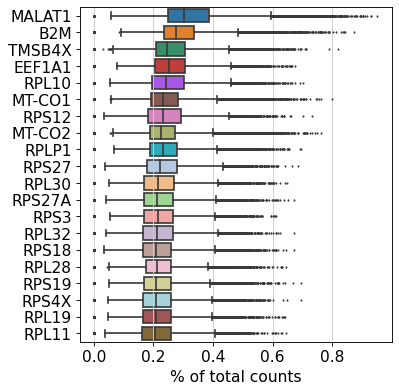

In [199]:
sc.pl.highest_expr_genes(wu_data, n_top=20, )

In [203]:
wu_data.var['mt'] = wu_data.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(wu_data, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

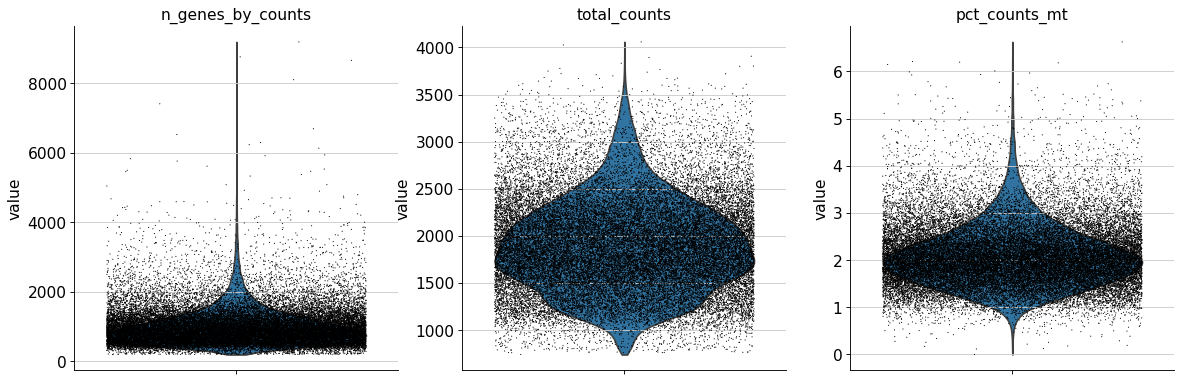

In [204]:
sc.pl.violin(wu_data, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [205]:
sc.pp.filter_cells(wu_data, min_genes=100)
sc.pp.filter_genes(wu_data, min_cells=3)

filtered out 8943 genes that are detected in less than 3 cells


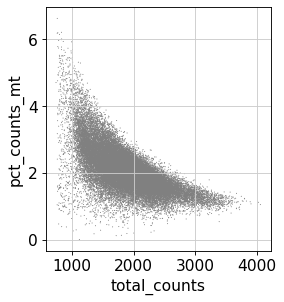

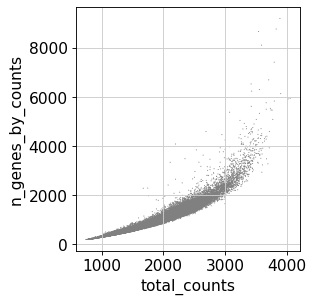

In [207]:
sc.pl.scatter(wu_data, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(wu_data, x='total_counts', y='n_genes_by_counts')

In [208]:
wu_data =wu_data[wu_data.obs.n_genes_by_counts < 3500, :]
wu_data = wu_data[wu_data.obs.pct_counts_mt < 5, :]
sc.pp.normalize_total(wu_data, target_sum=1e4)
sc.pp.log1p(wu_data)

/home/olam/miniconda3/envs/scell/lib/python3.6/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)


In [212]:
wu_data.var.rename(columns={0: "gene_name", 1:'gene_name1', 2:'type'}, inplace=True)

In [214]:
# save filtered normalized data
results_file = './processed/wu_filtered.h5ad'
wu_data.write(results_file)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


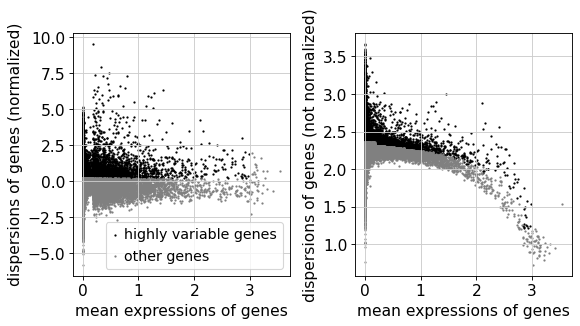

In [217]:
sc.pp.highly_variable_genes(wu_data, min_mean=0, max_mean=3, min_disp=0.2)
sc.pl.highly_variable_genes(wu_data)

In [320]:
wu = wu_data[:, wu_data.var.highly_variable]

In [219]:
sc.pp.regress_out(wu, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(wu, max_value=10)

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:02:21)


In [222]:
sc.tl.pca(wu)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:30)


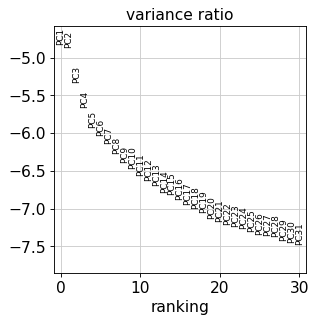

In [223]:
sc.pl.pca_variance_ratio(wu, log=True)

In [232]:
sc.pp.neighbors(wu, n_neighbors=30, n_pcs=20)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)


In [225]:
sc.tl.leiden(wu, resolution=0.5)
sc.tl.paga(wu)
sc.pl.paga(wu, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(wu, init_pos='paga')

running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:12)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:02)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


In [282]:
sc.tl.umap(wu)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


In [238]:
sc.tl.leiden(wu, resolution=0.6)

running Leiden clustering
    finished: found 20 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:07)


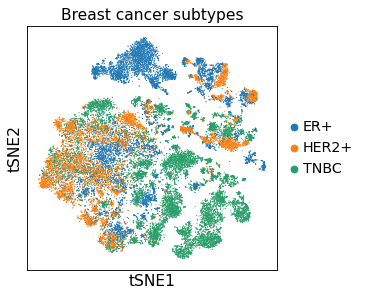

In [253]:
sc.pl.tsne(wu, color=['BC subtype'], title='Breast cancer subtypes')

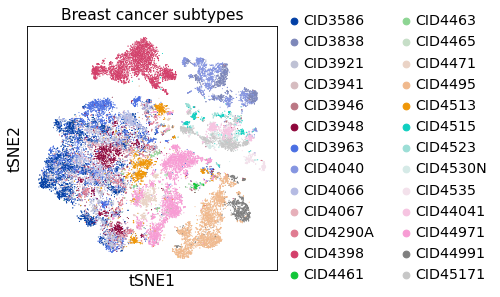

In [314]:
sc.pl.tsne(wu, color=['Patient'], title='Breast cancer subtypes')

In [324]:
wu_data_raw = wu_data.copy()

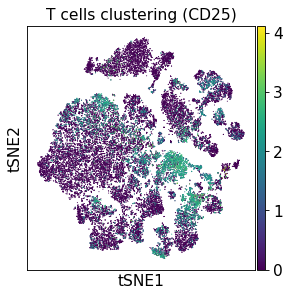

In [292]:
sc.pl.tsne(wu_data, color=['LAG3'], title='T cells clustering (CD25)')

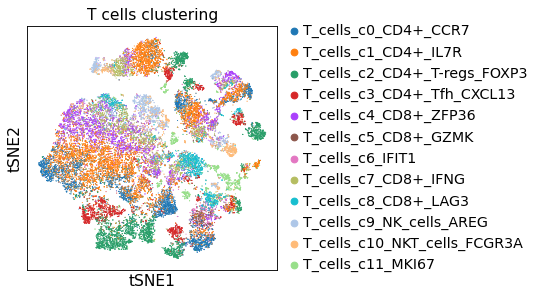

In [313]:
sc.pl.tsne(wu_data, color=['cell_type_original_subset'], title='T cells clustering')

In [311]:
wu_data

AnnData object with n_obs × n_vars = 34968 × 20790
    obs: 'barcode', 'cell_type_original', 'cell_type_original_subset', 'BC subtype', 'Patient', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_name', 'gene_name1', 'type', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'BC subtype_colors', 'rank_genes_groups'
    obsm: 'X_tsne'

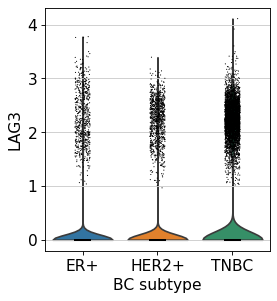

In [300]:
sc.pl.violin(wu_data, ['LAG3'], groupby='BC subtype')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


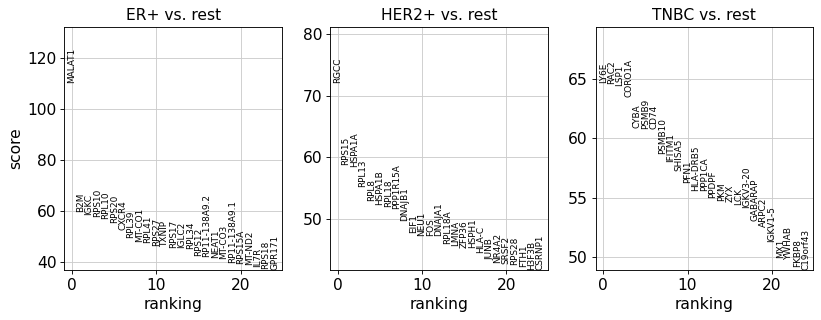

In [301]:
sc.tl.rank_genes_groups(wu_data, 'BC subtype', method='t-test')
sc.pl.rank_genes_groups(wu_data, n_genes=25, sharey=False)

ranking genes
/home/olam/miniconda3/envs/scell/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:48)


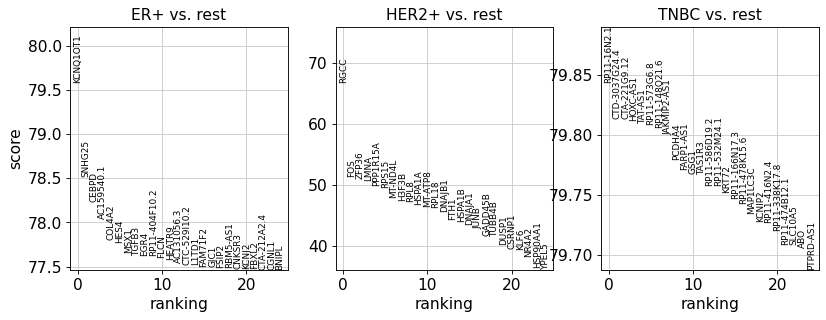

In [309]:
sc.tl.rank_genes_groups(wu, 'BC subtype', method='wilcoxon')
sc.pl.rank_genes_groups(wu, n_genes=25, sharey=False)

In [310]:
pd.DataFrame(wu_data.uns['rank_genes_groups']['names']).head(30)

,ER+,HER2+,TNBC
0,MALAT1,RGCC,LY6E
1,B2M,RPS15,RAC2
2,IGKC,HSPA1A,LSP1
3,RPS10,RPL13,CORO1A
4,RPL10,RPL8,CYBA
5,RPS20,HSPA1B,PSMB9
6,CXCR4,RPL18,CD74
7,RPL39,PPP1R15A,PSMB10
8,MT-CO1,DNAJB1,IFITM1
9,RPL41,EIF1,SHISA5


# Savas data - TNBC

In [3]:
m = sio.mmread('./Savas/GSE110686_tils20+32_matrix.mtx.gz')
bars = pd.read_csv('./Savas/GSE110686_tils20+32_barcodes.tsv.gz', sep='\t', header=None)
genes = pd.read_csv('./Savas/GSE110686_tils20+32_genes.tsv.gz', sep='\t', header=None)

In [4]:
m = sparse.csr_matrix(m)

In [6]:
savas =  anndata.AnnData(X=m.T,
                          obs=bars,
                          var=genes)

/home/olam/miniconda3/envs/scell/lib/python3.6/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [7]:
savas

AnnData object with n_obs × n_vars = 6311 × 33694
    obs: 0
    var: 0, 1

In [8]:
savas.obs_names  = savas.obs[0]

In [9]:
savas.var_names = savas.var[1]

In [10]:
savas.var_names_make_unique()

In [11]:
savas.var.rename(columns={0: "gene_ensembl", 1:'gene_name'}, inplace=True)

In [12]:
savas.obs.rename(columns={0: "barcode"}, inplace=True)

In [20]:
results_file = './processed/savas_raw.h5ad'
savas.write(results_file)

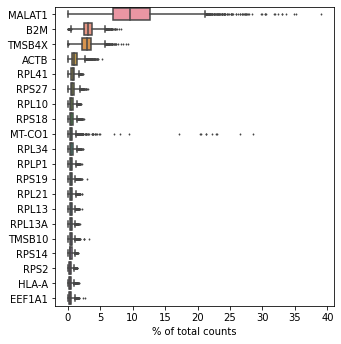

In [13]:
sc.pl.highest_expr_genes(savas, n_top=20, )

In [14]:
sc.pp.filter_cells(savas, min_genes=200)
sc.pp.filter_genes(savas, min_cells=3)

In [15]:
savas.var['mt'] = savas.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(savas, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

... storing 'gene_name' as categorical


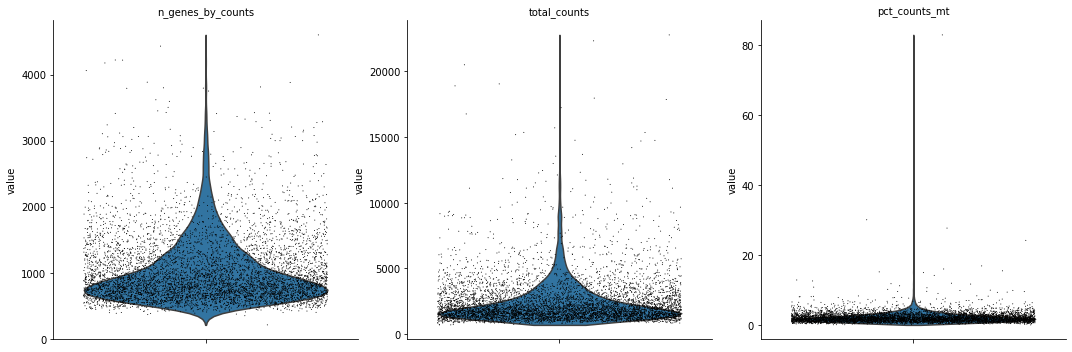

In [16]:
sc.pl.violin(savas, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

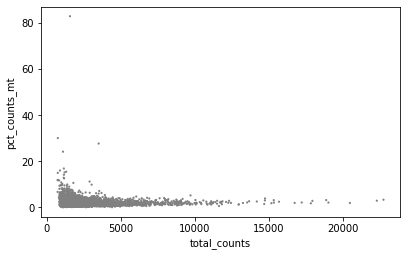

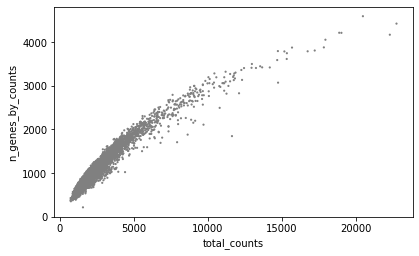

In [17]:
sc.pl.scatter(savas, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(savas, x='total_counts', y='n_genes_by_counts')

In [18]:

savas = savas[savas.obs.n_genes_by_counts < 2500, :]
savas = savas[savas.obs.pct_counts_mt < 10, :]
sc.pp.normalize_total(savas, target_sum=1e4)
sc.pp.log1p(savas)

/home/olam/miniconda3/envs/scell/lib/python3.6/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [21]:
results_file = './processed/savas_filtered.h5ad'
savas.write(results_file)

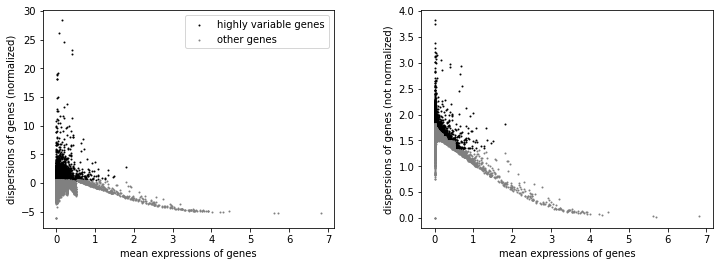

In [20]:
sc.pp.highly_variable_genes(savas, n_top_genes=5000, flavor='cell_ranger')
sc.pl.highly_variable_genes(savas)

In [22]:
savas

AnnData object with n_obs × n_vars = 6147 × 15623
    obs: 'barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ensembl', 'gene_name', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [36]:
savas = savas[:, savas.var.highly_variable]

In [37]:
sc.pp.regress_out(savas, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(savas, max_value=10)

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:16)


In [40]:
savas

AnnData object with n_obs × n_vars = 6147 × 2648
    obs: 'barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ensembl', 'gene_name', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [41]:
sc.tl.pca(savas)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)


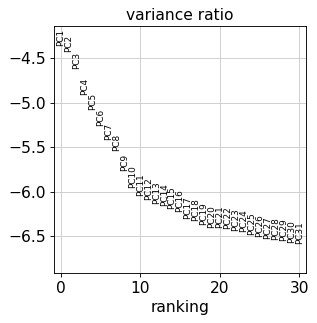

In [42]:
sc.pl.pca_variance_ratio(savas, log=True)


In [44]:
sc.pp.neighbors(savas, n_neighbors=30,n_pcs=15)

computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


In [90]:
sc.tl.leiden(savas, resolution=0.5)
sc.tl.paga(savas)
sc.pl.paga(savas, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(savas, init_pos='paga')

running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


In [61]:
sc.tl.tsne(savas)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:17)


normalizing counts per cell
    finished (0:00:00)


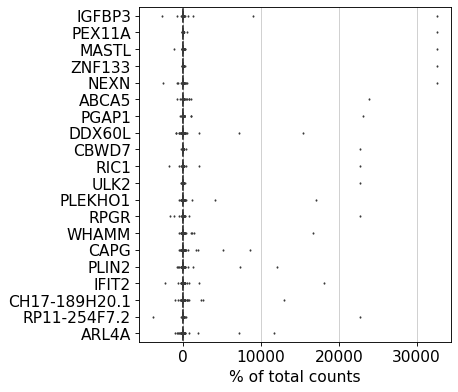

In [47]:
sc.pl.highest_expr_genes(savas, n_top=20, )

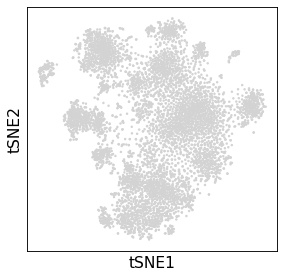

In [57]:
sc.pl.tsne(savas)

In [49]:
sc.tl.umap(savas)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


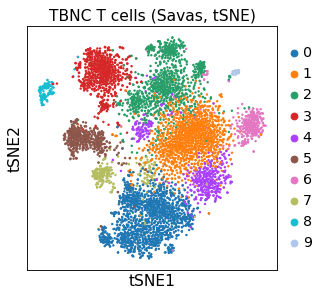

In [91]:
sc.pl.tsne(savas, color=['leiden'], title='TBNC T cells (Savas, tSNE)')

In [59]:
savas

AnnData object with n_obs × n_vars = 6147 × 2648
    obs: 'barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ensembl', 'gene_name', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'paga', 'leiden_sizes', 'umap', 'leiden_colors'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

ranking genes
/home/olam/miniconda3/envs/scell/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


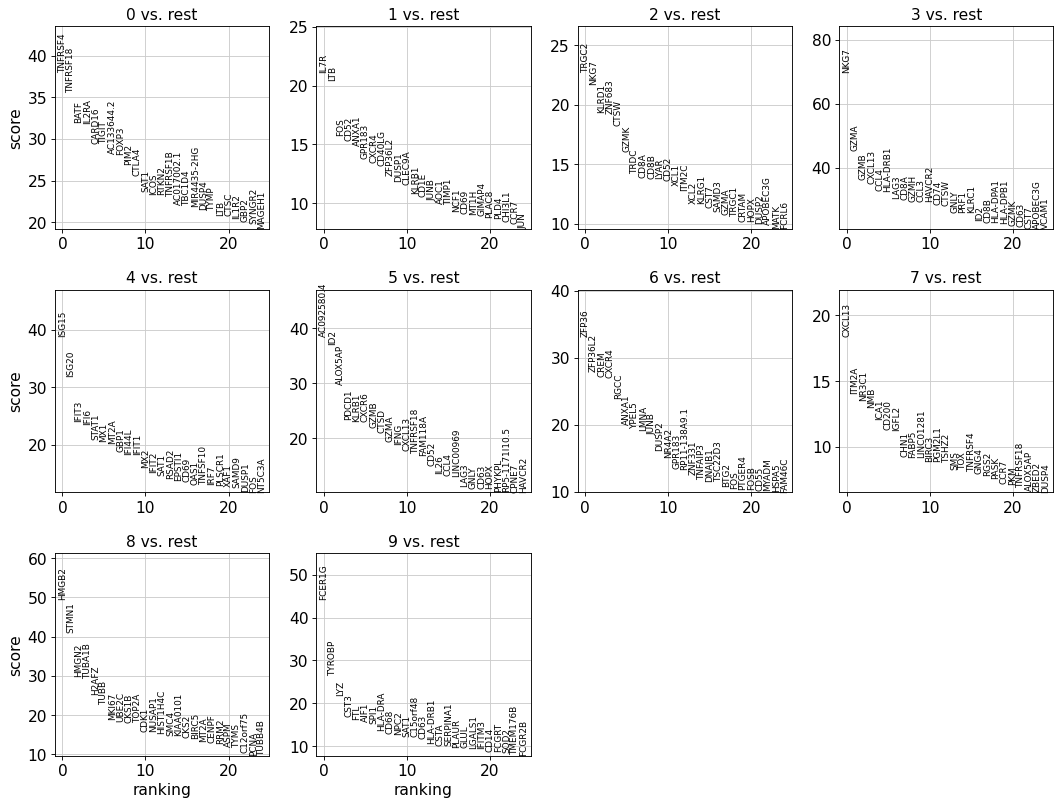

In [93]:
sc.tl.rank_genes_groups(savas, 'leiden', method='t-test')
sc.pl.rank_genes_groups(savas, n_genes=25, sharey=False)

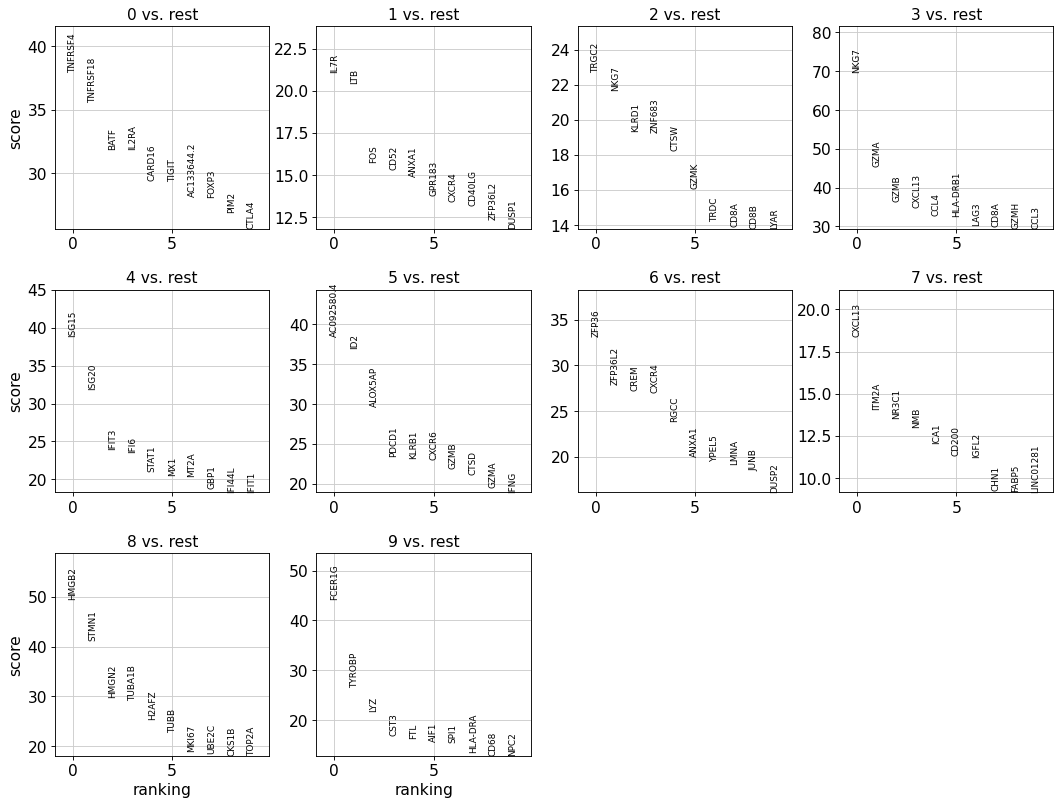

In [94]:
sc.pl.rank_genes_groups(savas, n_genes=10, sharey=False)

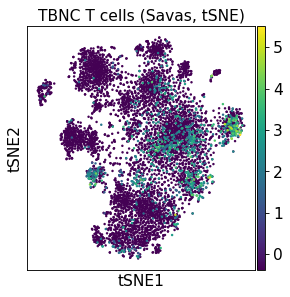

In [66]:
sc.pl.tsne(savas, color=['CCR7'], title='TBNC T cells (Savas, tSNE)')

In [95]:
pd.DataFrame(savas.uns['rank_genes_groups']['names']).head(10)

,0,1,2,3,4,5,6,7,8,9
0,TNFRSF4,IL7R,TRGC2,NKG7,ISG15,AC092580.4,ZFP36,CXCL13,HMGB2,FCER1G
1,TNFRSF18,LTB,NKG7,GZMA,ISG20,ID2,ZFP36L2,ITM2A,STMN1,TYROBP
2,BATF,FOS,KLRD1,GZMB,IFIT3,ALOX5AP,CREM,NR3C1,HMGN2,LYZ
3,IL2RA,CD52,ZNF683,CXCL13,IFI6,PDCD1,CXCR4,NMB,TUBA1B,CST3
4,CARD16,ANXA1,CTSW,CCL4,STAT1,KLRB1,RGCC,ICA1,H2AFZ,FTL
5,TIGIT,GPR183,GZMK,HLA-DRB1,MX1,CXCR6,ANXA1,CD200,TUBB,AIF1
6,AC133644.2,CXCR4,TRDC,LAG3,MT2A,GZMB,YPEL5,IGFL2,MKI67,SPI1
7,FOXP3,CD40LG,CD8A,CD8A,GBP1,CTSD,LMNA,CHN1,UBE2C,HLA-DRA
8,PIM2,ZFP36L2,CD8B,GZMH,IFI44L,GZMA,JUNB,FABP5,CKS1B,CD68
9,CTLA4,DUSP1,LYAR,CCL3,IFIT1,IFNG,DUSP2,LINC01281,TOP2A,NPC2


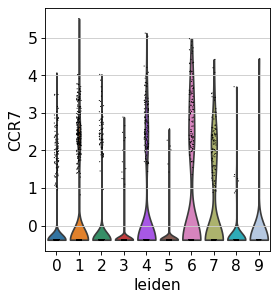

In [96]:
sc.pl.violin(savas, ['CCR7'], groupby='leiden')

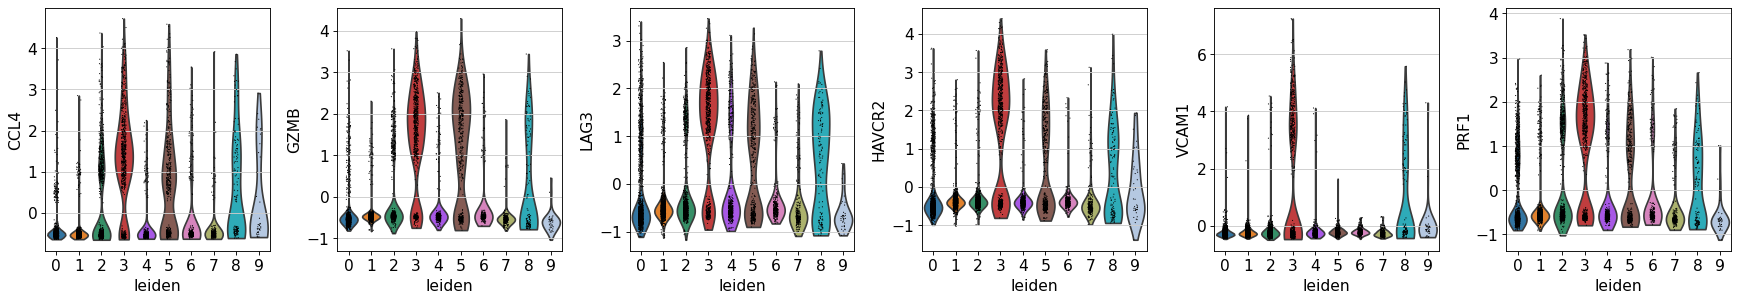

In [97]:
# CD8 Trm -> cluster 3
sc.pl.violin(savas, ['CCL4', 'GZMB', 'LAG3', 'HAVCR2', 'VCAM1', 'PRF1'], groupby='leiden')

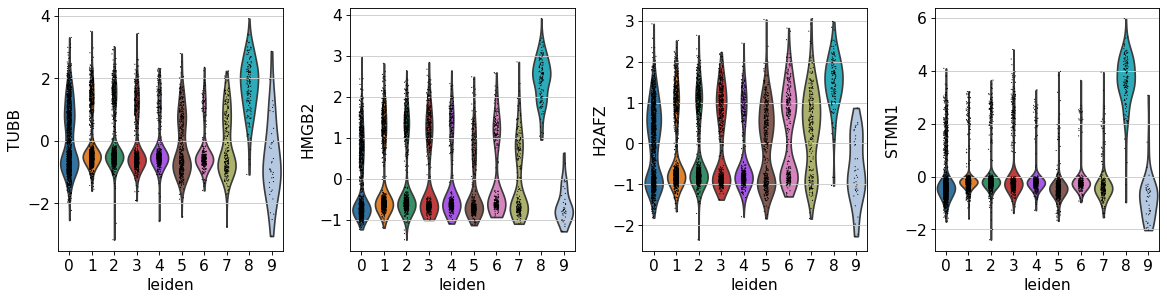

In [98]:
# CD8 Trm mitotic -> cluster 8
sc.pl.violin(savas, ['TUBB', 'HMGB2', 'H2AFZ', 'STMN1'], groupby='leiden')

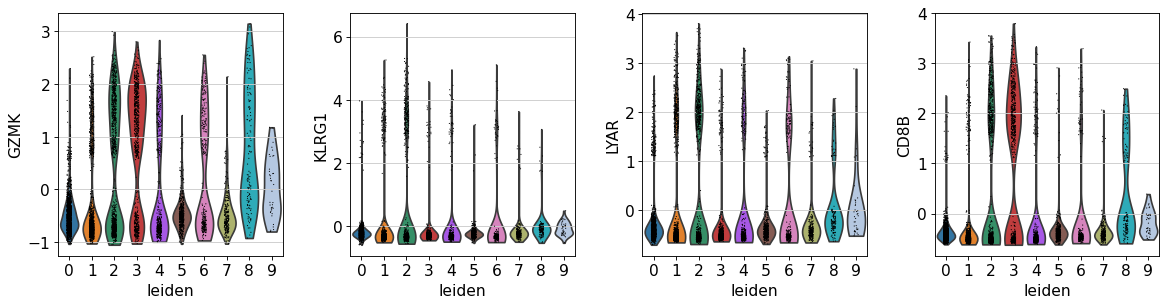

In [99]:
# CD8 Tem -> cluster 
sc.pl.violin(savas, ['GZMK', 'KLRG1', 'LYAR', 'CD8B'], groupby='leiden')

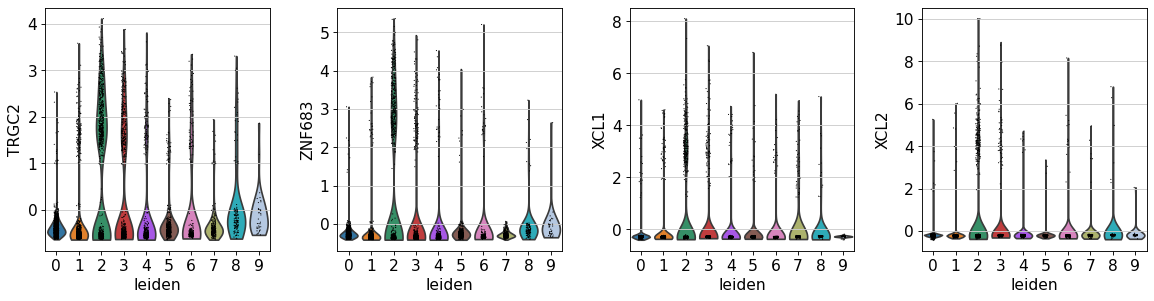

In [100]:
# Tgd -> cluster 
sc.pl.violin(savas, ['TRGC2', 'ZNF683', 'XCL1', 'XCL2'], groupby='leiden')

In [111]:
savas

AnnData object with n_obs × n_vars = 6147 × 2648
    obs: 'barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ensembl', 'gene_name', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'paga', 'leiden_sizes', 'umap', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

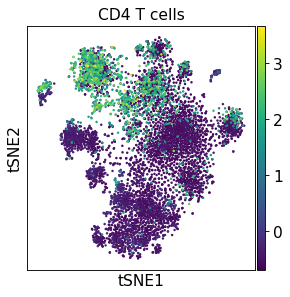

In [129]:
sc.pl.tsne(savas, color=['CD8A'], title='CD4 T cells')

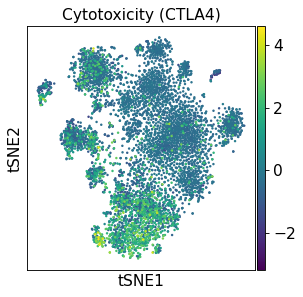

In [137]:
sc.pl.tsne(savas, color=['CTLA4'], title='Cytotoxicity (CTLA4)')

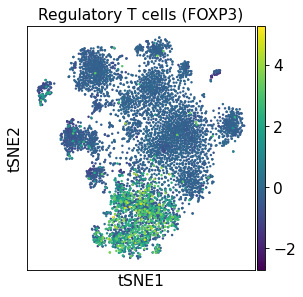

In [138]:
sc.pl.tsne(savas, color=['FOXP3'], title='Regulatory T cells (FOXP3)')

In [123]:
savas_raw = sc.read_h5ad('./processed/savas_raw.h5ad')

In [127]:
sc.pp.filter_cells(savas_raw, min_genes=200)
sc.pp.filter_genes(savas_raw, min_cells=3)
savas_raw.var['mt'] = savas_raw.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(savas_raw, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
savas_raw = savas_raw[savas_raw.obs.n_genes_by_counts < 2500, :]
savas_raw = savas_raw[savas_raw.obs.pct_counts_mt < 10, :]
sc.pp.normalize_total(savas_raw, target_sum=1e4)
sc.pp.log1p(savas_raw)

filtered out 9 cells that have less than 200 genes expressed
filtered out 18071 genes that are detected in less than 3 cells
/home/olam/miniconda3/envs/scell/lib/python3.6/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)


In [128]:
savas_raw.obsm['X_tsne'] = savas.obsm['X_tsne']

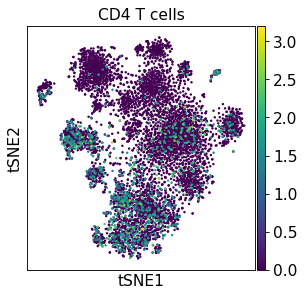

In [133]:
sc.pl.tsne(savas_raw, color=['CD4'], title='CD4 T cells')